<a href="https://colab.research.google.com/github/paritoshpr/IEM5703_Sp24/blob/main/Model03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### License and Header Import

In [ ]:
'''
A simple program to demonstrate Model03_02 example from the book Simio and
Simulation, Modeling and Analysis by Smith and Sturrock
Copyright (C) 2024  Paritosh P Ramanan

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Monte Carlo Integration


* Say we want to evaluate the value of the definite integral $\int\limits_{a}^b h(x)dx$ for $a<b$

* This is basically area under the curve $h(x)$ between a and b.

* Say the integration is hard. How do we approach this?

* For simplification lets assume that $h(x) \geq 0$

* Calculus tells us that we can divide the domain $[a,b]$ into numerous really small parts and calcuate the area of each of these "rectangles"

* As our intervals become more and more narrowm the subareas become more accurate.

**Can we create a static Monte Carlo simulation to get a statistical estimate of this integral or area?**

Lets consider the example below

## Example: Normal Random Variable

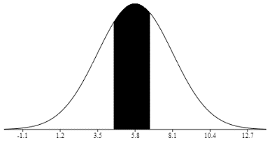

Assume we have a normal RV with mean $\mu$ and standard deviation $\sigma>0$

The pdf of this distribution is denoted by $N(\mu,\sigma,x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Clearly, integrating this function is quite tedious.

Lets use Monte Carlo simulation to integrate this function.

Consider just randomly $\mu=5.8,\sigma=2.3,a=4.5,b=6.7$

In [ ]:
mu = 5.8
sigma = 2.3
a = 4.5
b = 6.7

normal_denom = (sigma*np.sqrt(2*np.pi))
normal_exp_denom = (2*sigma**2)

def normal(x):
  return np.exp((-(x-mu)**2)/normal_exp_denom)/normal_denom

## Monte Carlo Simulation for Integral of $h(x)$

Here is how we can do this.

## Step 1



* Generate a random variable $U$ that follows a continous uniform distribution between $a$ and $b$. For now assume the availability of `numpy.random.rand`

* If $U \sim Uniform(0,1)$, then it implies it can be stretched to any domain $[a,b]$.

* Multiply $U(b-a)$. Why?

* Then we can do $U = U + a$ to truly get a value between $[a,b]$

* Evaluate the function $h(x)$ at $U\in[a,b]$

* Now compute $Y=(b-a)h(U)$.


In [ ]:
#generate U

sample_list = []

def generateSample(b,a):
  u = np.random.rand()

  u = u*(b-a)

  u = u + a

  h_u = normal(u)

  y = (b-a)*h_u

  return u,h_u,y

## Step 2



* Consider the following observations.

* If $h(x) = c$, then computing area under the curve would be straight forward. Why?

* However, we know that that is not the case and that $h(x)$ can be a highly non-linear function.

So what can we do?

## Step 3



* We know from Mean Value Theorem of Integration that $∃ y \in [a,b]$ such that $h(y)(b-a)$ is **exactly equal** to $\int\limits_{a}^b h(x)dx$

* So therefore, if we keep generating $Y_i = (b-a)h(U_i)$ repeatedly for say $n$ times and compute $\bar{Y} = \frac{\sum\limits_{i=1}^{n}Y_i}{n}$, then we can hope that $\bar{Y}$ slowly converges to $\int\limits_{a}^b h(x)dx$

* For each "trial", we may get $Y_i$ that can overestimate or underestimate $\int\limits_{a}^b h(x)dx$.

* **Thats Ok! **.

* Because in the long run (asymptotically) the over and under estimates will even out and converge to the expected value of $Y_i$.

* Using basic probability, it can be shown that $E[Y] = \int\limits_{a}^b h(x)dx$. How convenient!

In [ ]:
u,h_u,y = generateSample(b,a)

sample_list.append([u,h_u,y])

print("Generated {} samples so far".format(len(sample_list)))

df = pd.DataFrame(sample_list)
df.columns = ['u', 'h(x)', 'y']

Generated 51 samples so far


In [ ]:
v1 = norm.cdf(a,loc=mu,scale=sigma)
v2 = norm.cdf(b,loc=mu,scale=sigma)

real_y = v2-v1
print("Actual value of y {}".format(real_y))

Actual value of y 0.3662509027921427


In [ ]:
#E[Y]
expectation_y = df['y'].mean()
print("Expected MC value of y {}".format(expectation_y))

Expected MC value of y 0.36653826361731623


Now lets try and plot the $U$s

In [ ]:
# print data frame
print(df)

In [ ]:
#plot u
plt.hist(df['u'],bins=40,density=1)
plt.show()